# Get LUT for amplitude/phase to gray level

Converts the Intensity(g.l) or Phase(g.l) to gray_levels.

We want a function that converts the amplitude or phases (depending on the configuration) to Gray levels.

So that, in the experiments or simulations, when we simulate $t(x,y)=A(x,y)$ or $t(x,y)=e^{i\phi(x,y)}$ we convert it into gray levels

## Load

In [1]:
from scipy import interpolate

In [2]:
from diffractio import np, sp, plt, um, mm, degrees

from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.utils_drawing import draw2D

number of processors: 8


In [3]:
from slm.LCD_jones_matrices import get_LUT_amplitude, get_LUT_phases

number of processors: 8


## Ejemplo de uso: amplitud

In [4]:
data=np.load("LUT_amplitudes.npz")
amplitudes = data['amplitudes']
gl = data['gl']

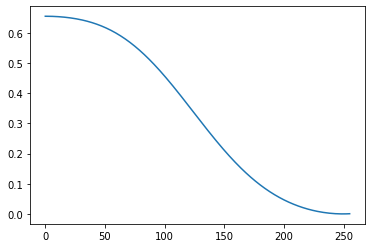

In [5]:
plt.plot(gl,amplitudes)

In [6]:
x=np.linspace(-100,100,128)
y=np.linspace(-100,100,128)
wavelength=0.6328*um

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7fd28e0c1be0>)

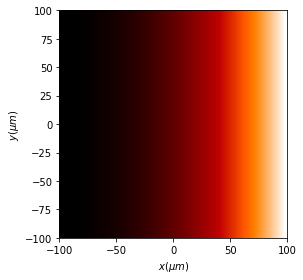

In [7]:
t_mask=Scalar_mask_XY(x,y,wavelength)
t_mask.gray_scale(255,0,1)
t_mask.draw()

In [8]:
LUT_amplitudes = get_LUT_amplitude(amplitudes, gl, t_mask.u)

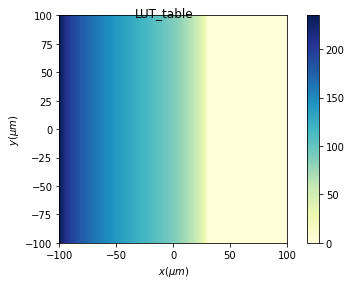

In [9]:
draw2D(
    LUT_amplitudes,
    x,
    y,
    title='LUT_table',
    color='YlGnBu',
    interpolation='none')
plt.colorbar()
plt.tight_layout()

## Ejemplo uso: fase

In [10]:
data=np.load("LUT_phases.npz")
gl = data['gl']
phases = data['phases']

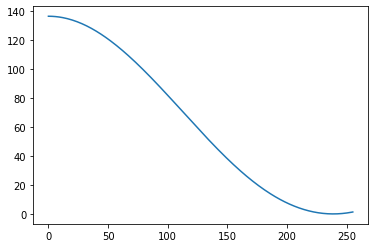

In [11]:
plt.plot(gl,phases/degrees)

In [12]:
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.utils_drawing import draw2D

In [13]:
x=np.linspace(-100,100,128)
y=np.linspace(-100,100,128)
wavelength=0.6328*um

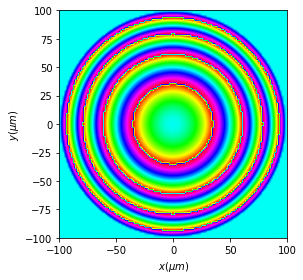

In [14]:
t_mask=Scalar_mask_XY(x,y,wavelength)
t_mask.lens(r0=(0,0), radius=(100,100), focal=(2*mm,2*mm))
t_mask.draw('phase');

In [15]:
LUT_phases=get_LUT_phases(phases, gl,np.angle(t_mask.u),has_draw=False)

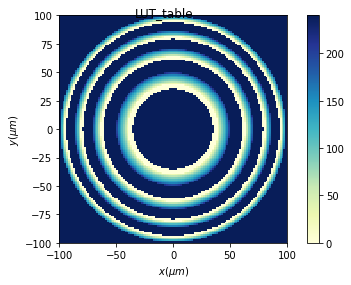

In [16]:
draw2D(LUT_phases, x,y,title='LUT_table', color='YlGnBu',  interpolation='none')
plt.colorbar()
plt.tight_layout()